<a href="https://colab.research.google.com/github/kkharel/Transportation_to_Work_Compositional_Dataset/blob/main/CompositionalData_Complete_Kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Mathematics

**What is Compositional dataset?**

Imagine we have a pie chart that shows parts of a whole.

$A=0.3$, $B=0.4$, $C=0.3$

All parts add up to $1$. This is what a compositional dataset is. It is the data made of relative parts, $not$ $absolute$ $amounts$.

We cannot interpret the numbers directly, it only makes sense in relation to each other. For instance, saying $A = 0.3$ and $B = 0.4$ means $B$ is bigger than $A$, but if we multiply by 10, ($A = 3, B=4, C=3$), the relationship stays the same.

Hence, compositional data "lives in a world where only ratios matter, not raw values.

**Why Regular Geometry doesn't work?**

In regular geometry, we work in $Euclidean$-space. We can do standard math like add, subtract, take average etc.

But compositinoal data isn't free to move anywhere. All the data points must add up to 1. The constraint is such that it must satisfy,

$$
A + B + C = 1
$$

So, the valid points aren't the whole $3D$ space- they lie on a flat $triangle-shaped$ surface that is a $2D$ plane inside a $3D$ space. This triangle is called the $simplex$.

$Simplex$ is just a fancy word for "*the shape that holds all possible compositions*".

If the number of parts equals two then the shape of simplex is a line segment that lives in $2D$. If the number of parts equals three then the shape of the simplex is a triangle surface that lives in $3D$. If the number of parts equals four then the shape of the simplex is a tetrahedron(pyramid) that lives in $4D$ and so on...

So, if we have three part composition $(A, B, C)$, each valid point lies on a triangle where $A+B+C = 1$ and $A, B, C \ge 0$. This triangle is not euclidean, we cannot just measure distances, averages etc. normally there because of $A+B+C=1$ constraint.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[0.6, 0.2, 0.2], [0.2, 0.5, 0.3], [0.1, 0.2, 0.7]])
print('Data: \n', data)

# tranform to 2D using barycentric coordinates for plotting

def barycentric_transform(x):
  """
  Map 3D compositional vector to 2D for simplex plotting
  """

  X = x[:, 1] + 0.5*x[:, 2]
  Y = (np.sqrt(3)/2) * x[:, 2]

  return X, Y

Data: 
 [[0.6 0.2 0.2]
 [0.2 0.5 0.3]
 [0.1 0.2 0.7]]


In [ ]:
  X, Y = barycentric_transform(data)
  print(X, Y)

[0.3  0.65 0.55] [0.17320508 0.25980762 0.60621778]


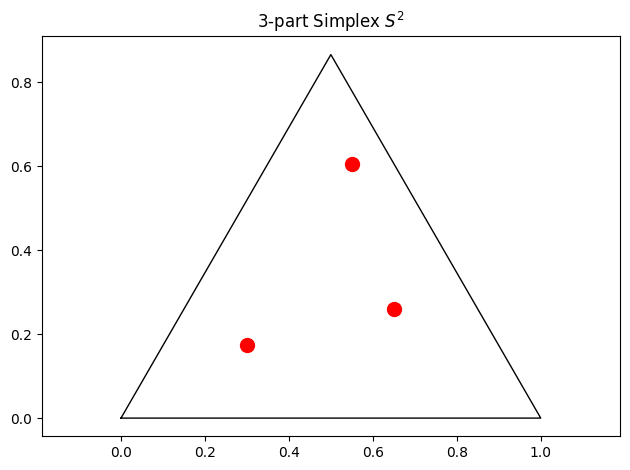

In [ ]:
triangle = np.array([[0,0], [1, 0], [0.5, np.sqrt(3)/2], [0,0]])
plt.plot(triangle[:, 0], triangle[:, 1], 'k-', lw=1)
plt.scatter(X, Y, color = 'red', s=100)
plt.title("3-part Simplex $S^2$")
plt.axis("equal")
plt.tight_layout()
plt.show()

Observe the 3-part composition triangle:

Moving along the triangle edge increases one component and decreases another. We cannot move off the triangle. Each point inside respects

$$A + B + C = 1$$

We can see the dependency: increasing one component (moving toward a vertex) necessarily decreases at least one of the other components.

This makes it clear why Euclidean distances are misleading for compositional data — the “natural” geometry is triangular, not the full unconstrained plane.

**What is Euclidean Space?**

Euclidean space is the normal coordinate space where we can move anywhere, $x,y,z$ axes goes to infinity.

In this space, we can perform vector operations like adding them, subtracting them, computing norms etc. But in simplex, we cannot just move freely because of constant-sum constraint so distances and averages must be redefined.

**Transformations to free the data**

Compositional vectors of $D$ positive parts are elements of $D - 1$ dimensional simplex.

$$
S^{D-1} = \{ x \in \mathbb{R}^D : x_i \geq 0, \sum_{i = 1}^D x_i = 1 \}
$$

The simplex is a convex polytope contained in the affine hyperplane $\{x: \sum_i x_i = 1\}$. Because of the unit-sum constraint the sample space is effectively $(D-1)$-dimensional and must be treated with a geometry appropriate for compositions.

In order to use regular math and geometry, we need to map the data from simplex to euclidean space.

We have two main transformations to do this.

##Centered Log-Ratio (CLR) Transformation:

First, Define the geometric mean of $x \in S^{D-1}$:

$$
g(x) = (∏_{i=1}^D x_i)^{1/D}
$$

The $CLR$ transformation is:

$$
z_i = clr(x_i) = \log \frac{x_i}{g(x)} = \log x_i - \log g(x) = \log x_i -\frac{1}{D} \sum_{j=1}^D \log x_j
$$

*Properties*:

1) $\sum_{i=1}^D z_i = 0$, the transformation centers the log-transformed composition around zero. So the transford data lives in $D-1$-dimensional subspace of $\mathbb{R}^D$

2) $z \in \mathbb{R}^D$ is suitable for euclidean operations

3) the transformation is invertible:

$$
x_i = \frac{exp(z_i)}{\sum_{j=1}^D exp(z_j)}, \space i=1,...,D.
$$

*What it means*:
Take the log of each component relative to the geometric mean of allwhich “centers” the composition so it can be treated more like Euclidean data.

*Example:*

For composition $[0.5, 0.3, 0.2]$:

Geometric mean = $(0.5*0.3*0.2)^{(1/3)}$.

clr = $[\ln(0.5/0.3), \ln(0.3/0.3), \ln(0.2/0.3)]$

Now we have data that looks like a vector in Euclidean space (it can be negative, unbounded). But CLR still has a constraint: all clr values sum to 0. So, it is still in a “subspace”, not fully free.


## Isometric Log-Ratio (ILR) Transformation
ILR is an improvement of CLR — it gives a fully Euclidean representation (no constraints). Instead of comparing each part to the geometric mean, ILR compares groups of parts using orthogonal balances. We can think of it as building “balances” — like comparing groups of parts in a tree-like fashion. For example: For 3 parts $(A, B, C)$, ILR might first compare $A$ to $(B \space and \space C)$, then compare $B$ to $C$. Mathematically, ILR uses special basis vectors that make sure the transformed space is orthonormal — meaning all dimensions are independent and Euclidean rules apply perfectly.


While the **CLR transformation** maps compositional data to a subspace of $\mathbb{R}^D$ (the components sum to 0), the **Isometric Log-Ratio (ILR)** transformation maps them **isometrically** to a full $(D-1)$-dimensional Euclidean space $\mathbb{R}^{D-1}$.

Let a composition be
$$
x = [x_1, x_2, \dots, x_D] \in S^{D-1},
\qquad
S^{D-1} = \{ x \in \mathbb{R}^D : x_i > 0,\; \sum_{i=1}^D x_i = 1 \}.
$$

The **Centered Log-Ratio (CLR)** of $x$ is

$$
\operatorname{clr}(x) =
\big[
\log x_1 - \tfrac{1}{D}\sum_{j=1}^D \log x_j,
\dots,
\log x_D - \tfrac{1}{D}\sum_{j=1}^D \log x_j
\big].
$$

This vector lies in the **zero-sum subspace**

$$
H = \{ z \in \mathbb{R}^D : \sum_{i=1}^D z_i = 0 \}.
$$

Now, choose an **orthonormal basis**

$$
V = [v_1, v_2, \dots, v_{D-1}]
$$

for $H$ (so $v_k^\top v_\ell = \delta_{k\ell}$ and each $v_k^\top \mathbf{1} = 0$).  

Then the **ILR transformation** is defined as

$$
\operatorname{ilr}(x) = V^\top \operatorname{clr}(x)
\in \mathbb{R}^{D-1}.
$$

Each coordinate is a **contrast** of log-components:

$$
\operatorname{ilr}_k(x) = v_k^\top \log x,
\quad k = 1, \dots, (D-1).
$$

**Intuitive Explanation**

- The CLR transform compares **each part to the geometric mean** of all parts, but it still lives in a constrained subspace (sum = 0).  
- ILR goes further: it builds **orthogonal balances** that compare **groups of parts** to each other in a way that creates **independent coordinates**.  
- These “balances” behave like regular Euclidean coordinates. We can apply regression, PCA, clustering, etc., without violating the compositional constraints.  
- We can think of ILR as defining an orthogonal coordinate system inside the simplex where geometry works just like in normal $\mathbb{R}^{D-1}$.

**Properties**

1. **Full Euclidean freedom:**
   $$
   \operatorname{ilr}(x) \in \mathbb{R}^{D-1} \quad \text{(no zero-sum constraint)}.
   $$

2. **Isometry:**
   The Euclidean distance between ILR coordinates equals the Aitchison distance in the simplex:
   $$
   d_A(x, y) = \| \operatorname{ilr}(x) - \operatorname{ilr}(y) \|_2.
   $$

3. **Invertibility:**
   Given $y = \operatorname{ilr}(x)$, recover $x$ by
   $$
   \operatorname{clr}(x) = V y,
   \qquad
   x_i = \frac{\exp([Vy]_i)}{\sum_{j=1}^D \exp([Vy]_j)},
   \quad i=1,\dots,D.
   $$

**Example:** $D = 3$

For a 3-part composition $ x = [x_1, x_2, x_3]$,  
one standard (Helmert) orthonormal basis is:
$$
v_1 = \sqrt{\tfrac{2}{3}}\,[1, -\tfrac{1}{2}, -\tfrac{1}{2}]^\top,
\qquad v_2 = \sqrt{\tfrac{1}{2}}\,[0, 1, -1]^\top.
$$

Hence the ILR coordinates are:

\begin{aligned}
\operatorname{ilr}_1(x) &=
\sqrt{\tfrac{2}{3}}
\log \frac{x_1}{\sqrt{x_2 x_3}}, \\[6pt]
\operatorname{ilr}_2(x) &=
\sqrt{\tfrac{1}{2}}
\log \frac{x_2}{x_3}.
\end{aligned}


**Example:** for $x = [0.5, 0.3, 0.2]$
\begin{aligned}
\operatorname{ilr}_1(x)
&= \sqrt{\tfrac{2}{3}}
\Big(\log 0.5 - \tfrac{1}{2}(\log 0.3 + \log 0.2)\Big) \\[6pt]
\operatorname{ilr}_2(x)
&= \sqrt{\tfrac{1}{2}}
(\log 0.3 - \log 0.2)
\end{aligned}

So the ILR-transformed vector is approximately:
$$
\operatorname{ilr}(x) = [\operatorname{ilr}_1(x),\, \operatorname{ilr}_2(x)].
$$

**Why ILR Matters**

- ILR makes compositional data **fully compatible with linear algebra and statistics**.  
- We can safely apply PCA, regression, clustering, etc., in ILR space.  
- When finished, we can transform results back with the **inverse ILR** (via closure of $\exp(Vy)$).  
- All geometric properties (angles, distances) in ILR space correspond exactly to those in the simplex under the Aitchison geometry.


## General Helmert Basis for ILR Transformation

The **Helmert matrix** provides an explicit orthonormal basis for the
zero-sum subspace $H = \{ z \in \mathbb{R}^D : \sum_{i=1}^D z_i = 0 \}$,
which is used to construct ILR coordinates.

The $D \times (D-1)$ **Helmert sub-matrix** $V$ has columns that form an orthonormal basis of $H$.
Each column corresponds to one ILR "balance" coordinate.


**Formula for Helmert Basis**: $V = [v_1, v_2, \dots, v_{D-1}]$

For $k = 1, \dots, (D-1)$, the $k$-th column vector $v_k \in \mathbb{R}^D$$ is defined as:

$$
v_k =
\begin{bmatrix}
\underbrace{\frac{1}{\sqrt{k(k+1)}}, \frac{1}{\sqrt{k(k+1)}}, \dots, \frac{1}{\sqrt{k(k+1)}}}_{k \text{ times}},
-\frac{k}{\sqrt{k(k+1)}},
\underbrace{0, \dots, 0}_{D - k - 1 \text{ times}}
\end{bmatrix}^\top
$$

**Example for $ D = 4$:**

$
V =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{12}} \\[4pt]
-\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{6}} & \frac{1}{\sqrt{12}} \\[4pt]
0 & -\frac{2}{\sqrt{6}} & \frac{1}{\sqrt{12}} \\[4pt]
0 & 0 & -\frac{3}{\sqrt{12}}
\end{bmatrix}
$

Each column is orthogonal to the others, and all columns sum to zero,
so $ V^\top V = I_{D-1}$ and $V^\top \mathbf{1} = 0$.


**ILR using the Helmert Basis:**

Once $V$ is constructed, the ILR transformation and its inverse are:

$$
\operatorname{ilr}(x) = V^\top \operatorname{clr}(x) = V^\top \log x,
$$

$$
x = \operatorname{closure}(\exp(V\,\operatorname{ilr}(x))),
\quad \text{where } \operatorname{closure}(u) = \frac{u}{\sum_i u_i}.
$$

**Intuitive Understanding**

- Each column of $V$ defines a **balance**: a log-ratio comparing the geometric mean of the first $k$ parts to the $(k+1)$-th part.  
- The scaling factors ensure the balances are **orthonormal**, so the resulting ILR coordinates are independent and Euclidean.  
- Using this basis, the ILR transformation gives a complete, unconstrained, and geometrically faithful representation of compositional data in $\mathbb{R}^{D-1}$.

**Summary**

$$
\boxed{
\begin{aligned}
\text{For any } D: \quad
& v_k(i) =
\begin{cases}
\dfrac{1}{\sqrt{k(k+1)}}, & i \le k, \\[6pt]
-\dfrac{k}{\sqrt{k(k+1)}}, & i = k+1, \\[6pt]
0, & i > k+1,
\end{cases}
\\[8pt]
& V = [v_1, v_2, \dots, v_{D-1}],
\\[6pt]
& \operatorname{ilr}(x) = V^\top \log x,
\quad
x = \operatorname{closure}(\exp(V\,\operatorname{ilr}(x))).
\end{aligned}
}
$$


## Application

The dataset, sourced from the National Transportation Atlas Database $(NTAD)$ and processed at the Census Tract level, represents the breakdown of workers' commute modes. This is a classic Compositional Data problem ($D=7$ component vector).

We will clean, structure and extracting seven key components: Drove Alone, Carpooled, Public Transit, Bicycle, Walk, Other Means, and Work From Home (WFH) from the dataset.

Then we will aplly Log-Ratio Transformations (ILR) to project the data from the constrained Simplex geometry (where the sum is constant) to unconstrained Euclidean space, enabling valid multivariate statistical and machine learning modeling.

From a business and policy perspective, this data is invaluable for urban and transportation planning, infrastructure investment optimization, and identifying areas ripe for micromobility or public transit expansion. Predictive modeling on this data can forecast mode-share changes based on sociodemographic or economic variables.

**Data Overview**

The dataset contains information on the means of transportation to work for workers across U.S. Census Tracts.Initial Size: 85,116 records.Cleaned Size: 84,383 records after dropping rows with null values (primarily in the percentage columns).Geographic Scope: The data is geolocated by geographic_id and parsed into county and state.

**The Compositional Vector**

The data is defined by a compositional vector of $D=7$ parts, where the percentage columns sum to approximately 100% for each Census Tract, representing the entire pool of workers.

The raw counts for these categories are also available as the count vector with the sum totaling total workers.

The dataset contains zero values in the percentage columns. Since the logarithm is undefined for zero, a small positive value (e.g., a multiplicative replacement using a non-parametric method like Bayes-Laplace) must be imputed for all zeros before applying the log-ratio transformations.

In [ ]:
import pandas as pd
import numpy as np
from typing import Union, List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# **Data Exploration and Cleaning**

In [ ]:
# load the dataset
df = pd.read_csv("/content/NTAD_Means_of_Transportation_to_Work_-4347144958748997132.csv", sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85116 entries, 0 to 85115
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   OBJECTID                                                    85116 non-null  int64  
 1   GEOID                                                       85116 non-null  int64  
 2   ALAND                                                       85116 non-null  int64  
 3   AWATER                                                      85116 non-null  int64  
 4   STATEFP                                                     85116 non-null  int64  
 5   COUNTYFP                                                    85116 non-null  int64  
 6   TRACTCE                                                     85116 non-null  int64  
 7   TRACTID                                                     85116 non-null  float64
 

In [ ]:
# drop the null values
df = df.dropna()

In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# check if there are null values left after dropping
print(df.isnull().sum().to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# check negative values in numeric columns
numeric = df.select_dtypes(['int64', 'float64'])
print((numeric <0).sum().to_dict())

{'OBJECTID': 0, 'GEOID': 0, 'ALAND': 622, 'AWATER': 26, 'STATEFP': 0, 'COUNTYFP': 0, 'TRACTCE': 0, 'TRACTID': 0, 'Total workers': 0, 'Workers traveling by car, truck, or van': 0, 'Workers traveling by car, truck, or van - drove alone': 0, 'Workers traveling by car, truck, or van - carpooled': 0, 'Workers traveling by public transportation': 0, 'Workers traveling by bicycle': 0, 'Workers traveling by walking': 0, 'Workers traveling by other means': 0, 'Workers working from home': 0, '% of workers traveling by car, truck, or van': 0, '% of workers traveling by car, truck, or van - drove alone': 0, '% of workers traveling by car, truck, or van - carpooled': 0, '% of workers traveling by public transportation': 0, '% of workers traveling by bicycle': 0, '% of workers traveling by walking': 0, '% of workers traveling by other means': 0, '% of workers working from home': 0, 'Shape__Area': 0, 'Shape__Length': 0}


In [ ]:
print(df.dtypes.to_dict())

{'OBJECTID': dtype('int64'), 'GEOID': dtype('int64'), 'ALAND': dtype('int64'), 'AWATER': dtype('int64'), 'STATEFP': dtype('int64'), 'COUNTYFP': dtype('int64'), 'TRACTCE': dtype('int64'), 'TRACTID': dtype('float64'), 'NAMELSAD': dtype('O'), 'NAME': dtype('O'), 'Total workers': dtype('int64'), 'Workers traveling by car, truck, or van': dtype('int64'), 'Workers traveling by car, truck, or van - drove alone': dtype('int64'), 'Workers traveling by car, truck, or van - carpooled': dtype('int64'), 'Workers traveling by public transportation': dtype('int64'), 'Workers traveling by bicycle': dtype('int64'), 'Workers traveling by walking': dtype('int64'), 'Workers traveling by other means': dtype('int64'), 'Workers working from home': dtype('int64'), '% of workers traveling by car, truck, or van': dtype('float64'), '% of workers traveling by car, truck, or van - drove alone': dtype('float64'), '% of workers traveling by car, truck, or van - carpooled': dtype('float64'), '% of workers traveling b

In [ ]:
df.head(n=2)

,OBJECTID,GEOID,ALAND,AWATER,STATEFP,COUNTYFP,TRACTCE,TRACTID,NAMELSAD,NAME,...,"% of workers traveling by car, truck, or van","% of workers traveling by car, truck, or van - drove alone","% of workers traveling by car, truck, or van - carpooled",% of workers traveling by public transportation,% of workers traveling by bicycle,% of workers traveling by walking,% of workers traveling by other means,% of workers working from home,Shape__Area,Shape__Length
0,1,4001945001,109611703,39384,4,1,945001,9450.01,Census Tract 9450.01,Census Tract 9450.01; Apache County; Arizona,...,85.80,85.80,0.00,0.84,0.0,0.28,1.62,11.45,0.010920,0.757993
1,2,4001945002,1163931489,709218,4,1,945002,9450.02,Census Tract 9450.02,Census Tract 9450.02; Apache County; Arizona,...,92.97,87.38,5.58,0.00,0.0,0.62,0.31,6.10,0.115578,1.712598


In [ ]:
df[['tract', 'county', 'state']] = df['NAME'].str.split(';', expand=True)

In [ ]:
# clean whitespace
df = df.apply(lambda x:x.str.strip() if x.dtype =='object' else x)

In [ ]:
df.shape

(84383, 32)

In [ ]:
df = df.drop(columns = ['ALAND',
                        'AWATER',
                        'OBJECTID',
                        'TRACTCE',
                        'TRACTID',
                        'NAMELSAD',
                        'NAME',
                        'tract',
                        'Shape__Length',
                        ])

In [ ]:
df.shape

(84383, 23)

In [ ]:
df = df.rename(columns={
    'GEOID':'geographic_id',
    'STATEFP':'state_fips_code',
    'COUNTYFP':'county_fips_code',
    'Shape__Area': 'area',
    'county':'county',
    'state': 'state',
    'Total workers': 'total_workers',
    'Workers traveling by car, truck, or van': 'mode_own_vehicle',
    'Workers traveling by car, truck, or van - drove alone': 'mode_own_vehicle_alone',
    'Workers traveling by car, truck, or van - carpooled': 'mode_own_vehicle_carpool',
    'Workers traveling by public transportation': 'mode_public',
    'Workers traveling by bicycle': 'mode_bicycle',
    'Workers traveling by walking': 'mode_walk',
    'Workers traveling by other means': 'mode_other',
    'Workers working from home': 'mode_none_wfh',
    '% of workers traveling by car, truck, or van': 'percent_own_vehicle',
    '% of workers traveling by car, truck, or van - drove alone': 'percent_own_vehicle_alone',
    '% of workers traveling by car, truck, or van - carpooled': 'percent_own_vehicle_carpool',
    '% of workers traveling by public transportation': 'percent_public',
    '% of workers traveling by bicycle': 'percent_bicycle',
    '% of workers traveling by walking': 'percent_walking',
    '% of workers traveling by other means': 'percent_other',
    '% of workers working from home': 'percent_wfh',
})

In [ ]:
pd.set_option('display.max_columns', None)
df.head(n=4)

,geographic_id,state_fips_code,county_fips_code,total_workers,mode_own_vehicle,mode_own_vehicle_alone,mode_own_vehicle_carpool,mode_public,mode_bicycle,mode_walk,mode_other,mode_none_wfh,percent_own_vehicle,percent_own_vehicle_alone,percent_own_vehicle_carpool,percent_public,percent_bicycle,percent_walking,percent_other,percent_wfh,area,county,state
0,4001945001,4,1,1423,1221,1221,0,12,0,4,23,163,85.80,85.80,0.00,0.84,0.0,0.28,1.62,11.45,0.010920,Apache County,Arizona
1,4001945002,4,1,967,899,845,54,0,0,6,3,59,92.97,87.38,5.58,0.00,0.0,0.62,0.31,6.10,0.115578,Apache County,Arizona
2,4001945100,4,1,777,667,652,15,0,0,8,34,68,85.84,83.91,1.93,0.00,0.0,1.03,4.38,8.75,0.159727,Apache County,Arizona
3,4001970201,4,1,837,585,509,76,0,0,0,4,248,69.89,60.81,9.08,0.00,0.0,0.00,0.48,29.63,0.159647,Apache County,Arizona


In [ ]:
# check negative values in dataset again
numeric = df.select_dtypes(['int64', 'float64'])
print((numeric <0).sum().to_dict())

{'geographic_id': 0, 'state_fips_code': 0, 'county_fips_code': 0, 'total_workers': 0, 'mode_own_vehicle': 0, 'mode_own_vehicle_alone': 0, 'mode_own_vehicle_carpool': 0, 'mode_public': 0, 'mode_bicycle': 0, 'mode_walk': 0, 'mode_other': 0, 'mode_none_wfh': 0, 'percent_own_vehicle': 0, 'percent_own_vehicle_alone': 0, 'percent_own_vehicle_carpool': 0, 'percent_public': 0, 'percent_bicycle': 0, 'percent_walking': 0, 'percent_other': 0, 'percent_wfh': 0, 'area': 0}


In [ ]:
# the dataset includes puerto rico as US state

In [ ]:
df.describe(include='all')

,geographic_id,state_fips_code,county_fips_code,total_workers,mode_own_vehicle,mode_own_vehicle_alone,mode_own_vehicle_carpool,mode_public,mode_bicycle,mode_walk,mode_other,mode_none_wfh,percent_own_vehicle,percent_own_vehicle_alone,percent_own_vehicle_carpool,percent_public,percent_bicycle,percent_walking,percent_other,percent_wfh,area,county,state
count,8.438300e+04,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383.000000,84383,84383
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960,52
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles County,California
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2471,9057
mean,2.834531e+10,28.255928,89.128557,1880.564308,1481.289904,1321.624569,159.665335,65.611012,8.378169,45.175687,27.399725,252.709811,79.180833,70.530707,8.650132,3.604500,0.448215,2.618849,1.522975,12.624619,0.013028,NaN,NaN
std,1.650858e+10,16.485934,99.552788,929.049368,773.230250,700.437391,134.267349,186.522976,28.126972,116.815169,43.929591,247.254950,16.024732,15.344751,6.008204,9.080096,1.394748,5.376493,2.439560,9.113932,0.255799,NaN,NaN
min,1.001020e+09,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,NaN,NaN
25%,1.300997e+10,13.000000,31.000000,1221.000000,929.000000,822.000000,67.000000,0.000000,0.000000,0.000000,0.000000,82.000000,73.980000,64.730000,4.460000,0.000000,0.000000,0.000000,0.000000,5.860000,0.000180,NaN,NaN
50%,2.804900e+10,28.000000,67.000000,1762.000000,1394.000000,1241.000000,127.000000,4.000000,0.000000,16.000000,13.000000,178.000000,83.440000,73.770000,7.500000,0.250000,0.000000,0.940000,0.750000,10.560000,0.000485,NaN,NaN
75%,4.201301e+10,42.000000,113.000000,2399.000000,1928.500000,1723.000000,215.000000,48.000000,0.000000,48.000000,36.000000,346.000000,89.570000,80.460000,11.550000,2.690000,0.000000,2.850000,2.040000,17.470000,0.003084,NaN,NaN


In [ ]:
# verification of compositional structure of the dataset
(df[['percent_own_vehicle_alone',
  'percent_own_vehicle_carpool',
  'percent_public',
  'percent_bicycle',
  'percent_walking',
  'percent_other',
  'percent_wfh']].sum(axis=1)[0])

np.float64(99.99000000000001)

In [ ]:
print(np.sum(df == 0))  # counts all zeros in the dataset


geographic_id                      0
state_fips_code                    0
county_fips_code                   0
total_workers                      0
mode_own_vehicle                  52
mode_own_vehicle_alone            68
mode_own_vehicle_carpool        1902
mode_public                    39169
mode_bicycle                   63848
mode_walk                      26108
mode_other                     27803
mode_none_wfh                   1682
percent_own_vehicle               52
percent_own_vehicle_alone         68
percent_own_vehicle_carpool     1902
percent_public                 39169
percent_bicycle                63848
percent_walking                26108
percent_other                  27803
percent_wfh                     1682
area                               0
county                             0
state                              0
dtype: int64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
print(df.columns.to_list())

['geographic_id', 'state_fips_code', 'county_fips_code', 'total_workers', 'mode_own_vehicle', 'mode_own_vehicle_alone', 'mode_own_vehicle_carpool', 'mode_public', 'mode_bicycle', 'mode_walk', 'mode_other', 'mode_none_wfh', 'percent_own_vehicle', 'percent_own_vehicle_alone', 'percent_own_vehicle_carpool', 'percent_public', 'percent_bicycle', 'percent_walking', 'percent_other', 'percent_wfh', 'area', 'county', 'state']


In [ ]:
df_selected = df[['geographic_id', 'percent_own_vehicle_alone', 'percent_own_vehicle_carpool', 'percent_public', 'percent_bicycle', 'percent_walking', 'percent_other', 'percent_wfh', 'area', 'county', 'state']]
df_selected.head()


,geographic_id,percent_own_vehicle_alone,percent_own_vehicle_carpool,percent_public,percent_bicycle,percent_walking,percent_other,percent_wfh,area,county,state
0,4001945001,85.80,0.00,0.84,0.0,0.28,1.62,11.45,0.010920,Apache County,Arizona
1,4001945002,87.38,5.58,0.00,0.0,0.62,0.31,6.10,0.115578,Apache County,Arizona
2,4001945100,83.91,1.93,0.00,0.0,1.03,4.38,8.75,0.159727,Apache County,Arizona
3,4001970201,60.81,9.08,0.00,0.0,0.00,0.48,29.63,0.159647,Apache County,Arizona
4,4001970202,81.58,4.28,0.00,0.0,0.66,12.83,0.66,0.348577,Apache County,Arizona


### Showing why we cannot apply ML models directly

In [ ]:
X = df_selected[['percent_own_vehicle_alone', 'percent_own_vehicle_carpool', 'percent_public', 'percent_bicycle', 'percent_walking', 'percent_other', 'percent_wfh', 'area']]
y = df_selected[['percent_own_vehicle_carpool']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    # "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

results = []
train_mse_values = []
test_mse_values = []
cv_mse_values = []
model_names = []

kf = KFold(n_splits = 10, shuffle=True, random_state=42)

for name, model in models.items():
  cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'neg_mean_squared_error')
  avg_cv_mse = np.mean(cv_mse)

  model.fit(X_train_scaled, y_train)

  y_train_pred = model.predict(X_train_scaled)
  y_test_pred = model.predict(X_test_scaled)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)
  train_r2_score = r2_score(y_train, y_train_pred)
  test_r2_score = r2_score(y_test, y_test_pred)

  results.append((name, avg_cv_mse, train_mse, test_mse, test_rmse, train_r2_score, test_r2_score))

In [ ]:
pd.DataFrame(results, columns = ['Model', 'Cv MSE', 'Train MSE', 'Test MSE', 'Test RMSE', 'Train R2', 'Test R2']).sort_values(by = 'Test MSE')

,Model,Cv MSE,Train MSE,Test MSE,Test RMSE,Train R2,Test R2
0,Linear Regression,3.276358e-29,1.600153e-29,1.527640e-29,3.908504e-15,1.000000,1.000000
1,XGBoost,7.574072e-02,2.238609e-03,3.676140e-02,1.917326e-01,0.999938,0.998949


We can see above we can't just use regular features for compositional dataset. We are going to use the standard and higly used method Isometric Log-Ratio.

# **Data Transformation**

In [ ]:
def _generate_ilr_basis(D):
  """
  Generates the default 'pivot' SBP basis matrix V for D components.
  V will be D x (D-1). Each column is a balance vector.
  """
  V = np.zeros((D, D - 1))

  for j in range(1, D): # j is the index of the last component in the numerator (positive group)

    # Denominator for all non-zero terms
    den = np.sqrt(j * (j + 1))

    # Positive group (components 0 to j-1)
    V[:j, j - 1] = 1.0 / den

    # Negative group (component j)
    V[j, j - 1] = -j / den

  return V

def ilr_transform(compositional_components, epsilon=1e-9):
  """
  Isometric Log-Ratio (ILR) transformation that preserves DataFrame structure
  and handles zeros via a small pseudocount.

  The ILR transformation maps the D-part composition to D-1 unconstrained,
  orthonormal coordinates (balances), eliminating collinearity.

  Parameters
  ----------
  compositional_components : pd.DataFrame or np.ndarray
      Each row must be a composition (positive parts summing to 1).
  epsilon : float, default=1e-9
      Small value to replace zeros in the composition (zero replacement).

  Returns
  -------
  pd.DataFrame or np.ndarray
      ILR-transformed composition with D-1 columns. Column names will be
      renamed to 'ilr_0', 'ilr_1', etc., if the input was a DataFrame.
  """

  # Preserve DataFrame info if applicable
  is_df = isinstance(compositional_components, pd.DataFrame)
  idx = compositional_components.index if is_df else None

  X = np.asarray(compositional_components, dtype=float)
  D = X.shape[1]

  # 1. Zero Replacement and Re-closure (Aitchison's perturbation)
  # Replace zeros with epsilon
  X[X <= 0] = epsilon

  # Re-normalize rows to sum=1 to preserve closure
  X = X / X.sum(axis=1, keepdims=True)

  # 2. Log-Ratio Basis Generation
  V = _generate_ilr_basis(D)

  # 3. Apply the ILR Transformation: ILR(X) = log(X) @ V
  logX = np.log(X)
  ilrX = logX @ V

  if is_df:
    new_cols = [f'ilr_{i}' for i in range(D - 1)]
    return pd.DataFrame(ilrX, columns=new_cols, index=idx)
  else:
    return ilrX

In [ ]:
compositional_components = ['percent_own_vehicle_alone', 'percent_own_vehicle_carpool', 'percent_public', 'percent_bicycle', 'percent_walking', 'percent_other', 'percent_wfh']
ilr_subset = ilr_transform(df_selected[compositional_components], epsilon=1e-9)
df_ilr = (df_selected.drop(columns=compositional_components).join(ilr_subset))
df_ilr.head()

,geographic_id,area,county,state,ilr_0,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
0,4001945001,0.010920,Apache County,Arizona,17.801615,-6.500350,13.199439,-7.172636,-7.458879,-8.114403
1,4001945002,0.115578,Apache County,Arizona,1.945306,19.447310,13.751325,-7.456154,-5.455170,-7.368915
2,4001945100,0.159727,Apache County,Arizona,2.667366,18.997343,13.433150,-8.156617,-7.981222,-7.386036
3,4001970201,0.159647,Apache County,Arizona,1.344691,19.498085,13.787228,10.679541,-9.527839,-11.869424
4,4001970202,0.348577,Apache County,Arizona,2.084290,19.310989,13.654931,-7.586740,-8.903311,-4.777483


# **Train-Test Split**

In [ ]:
X = df_ilr.drop(columns = ['ilr_0'])

y = df_ilr[['ilr_0']]

In [ ]:
X.head()

,geographic_id,area,county,state,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
0,4001945001,0.010920,Apache County,Arizona,-6.500350,13.199439,-7.172636,-7.458879,-8.114403
1,4001945002,0.115578,Apache County,Arizona,19.447310,13.751325,-7.456154,-5.455170,-7.368915
2,4001945100,0.159727,Apache County,Arizona,18.997343,13.433150,-8.156617,-7.981222,-7.386036
3,4001970201,0.159647,Apache County,Arizona,19.498085,13.787228,10.679541,-9.527839,-11.869424
4,4001970202,0.348577,Apache County,Arizona,19.310989,13.654931,-7.586740,-8.903311,-4.777483


In [ ]:
y.head()

,ilr_0
0,17.801615
1,1.945306
2,2.667366
3,1.344691
4,2.084290


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
geo_info = X_test[['state', 'county', 'geographic_id']].copy()
cols_to_drop = ['state', 'county', 'geographic_id']
X_train_model = X_train.drop(columns=cols_to_drop)
X_test_model = X_test.drop(columns=cols_to_drop)

In [ ]:
X_train_model.head()

,area,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
14558,0.000207,19.529119,13.809172,-9.308344,12.817167,-10.705870
14987,0.000281,19.554702,13.827263,10.710552,8.745129,-13.955077
80380,0.000806,19.690799,13.923497,10.785095,8.805993,-13.303180
13790,0.005168,19.580370,13.845412,-7.411671,12.458661,-11.245741
63072,0.001508,19.071326,13.485464,-7.586883,-6.570124,-8.699150


In [ ]:
X_test_model.head()

,area,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
28555,0.009244,19.781479,13.987618,-7.735770,-6.316230,-5.047798
42613,0.000325,0.902211,20.315823,-1.558944,-2.973121,-5.024121
62618,0.001981,2.383725,20.117065,-3.920437,-1.834163,-3.831832
50288,0.000077,1.666398,1.529465,-1.630384,2.296600,-0.503256
30738,0.000830,2.287018,19.177545,-5.737398,-2.322729,-4.082416


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_model)
X_test_scaled = scaler.transform(X_test_model)

# ***Multicollinearity Diagnostics***

In [ ]:
# Linear Dependence Check
for i in range(X_train_scaled.shape[1]):
  A = np.delete(X_train_scaled, i, axis = 1)
  x = X_train_scaled[:, i:i+1]

  A_tilde = np.hstack((A, x))

  if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(A_tilde):
    print(f'Column {i} is linearly dependent')
  else:
    print(f'Columns {i} is linearly independent')

Columns 0 is linearly independent
Columns 1 is linearly independent
Columns 2 is linearly independent
Columns 3 is linearly independent
Columns 4 is linearly independent
Columns 5 is linearly independent


In [ ]:
# Multicollinearity check
col_names = X_train_model.columns.to_list()
print(col_names)

B = pd.DataFrame(X_train_scaled, columns = col_names)
B = sm.add_constant(B)

vif_data = pd.DataFrame()
vif_data["feature"] = B.columns
vif_data["VIF"] = [variance_inflation_factor(B.values, i) for i in range(B.shape[1])]
vif_data

['area', 'ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']


,feature,VIF
0,const,1.000000
1,area,1.001400
2,ilr_1,1.748889
3,ilr_2,1.263123
4,ilr_3,1.250696
5,ilr_4,1.205278
6,ilr_5,1.827296


<Axes: >

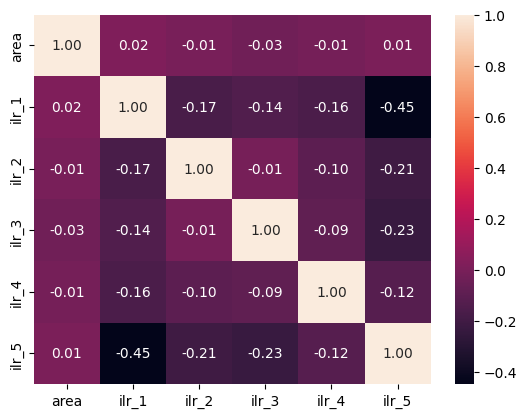

In [ ]:
# correlation check (pairwise)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = col_names)

corr_matrix = X_train_scaled_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f')

# **Model Fitting & Evaluation**

***Baseline Model (Mean Predictor)***

In [ ]:
# Baseline
dummy = DummyRegressor(strategy="quantile", quantile=0.5)
dummy.fit(X_train_scaled, y_train)
y_pred_baseline = dummy.predict(X_test)

baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline R²: {baseline_r2:.4f}")


Baseline MSE: 5.2034
Baseline R²: -0.0221


***Models***

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    # "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
    # Add more models if you want to but I am only choosing these two just to show the application
}

***Model Training and Cross Validation Default Hyperparamters***

In [ ]:
results = []
train_mse_values = []
test_mse_values = []
cv_mse_values = []
model_names = []

kf = KFold(n_splits = 10, shuffle=True, random_state=42)

for name, model in models.items():
  cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv = kf, scoring = 'neg_mean_squared_error')
  avg_cv_mse = np.mean(cv_mse)

  model.fit(X_train_scaled, y_train)

  y_train_pred = model.predict(X_train_scaled)
  y_test_pred = model.predict(X_test_scaled)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)
  train_r2_score = r2_score(y_train, y_train_pred)
  test_r2_score = r2_score(y_test, y_test_pred)

  results.append((name, avg_cv_mse, train_mse, test_mse, test_rmse, train_r2_score, test_r2_score))

In [ ]:
pd.DataFrame(results, columns = ['Model', 'Cv MSE', 'Train MSE', 'Test MSE', 'Test RMSE', 'Train R2', 'Test R2']).sort_values(by = 'Test MSE')

,Model,Cv MSE,Train MSE,Test MSE,Test RMSE,Train R2,Test R2
1,XGBoost,0.413520,0.081315,0.288220,0.536861,0.986086,0.943387
0,Linear Regression,4.738282,4.735779,4.171093,2.042325,0.189670,0.180701


***Best Model Hyperparameter Tuning***

In [ ]:
param_distributions = {
    "XGBoost (tuned)": {
      'n_estimators': randint(200, 1500),
      'learning_rate': uniform(0.005, 0.05),
      'max_depth': randint(3, 12),
      'min_child_weight': randint(1, 10),
      'subsample': uniform(0.5, 0.5),
      'colsample_bytree': uniform(0.5, 0.5),
      'gamma': uniform(0, 1),
      'reg_alpha': uniform(0, 1),
      'reg_lambda': uniform(0.5, 2.0),
    }
}

In [ ]:
selected_model = {
    "XGBoost (tuned)": XGBRegressor()
    # You can select more than one model and use other methods like stacking, blending etc to get that last drop or improve the model
}

best_models = {}
results = []

for name, model in selected_model.items():

  random_search = RandomizedSearchCV(estimator = model, param_distributions = param_distributions[name], n_iter=10, scoring = 'neg_mean_squared_error', cv = 10, verbose=1, random_state = 42)
  random_search.fit(X_train_scaled, y_train)

  best_params = random_search.best_params_
  best_score = random_search.best_score_

  best_model = random_search.best_estimator_
  best_models[name] = best_model

  y_train_pred = best_model.predict(X_train_scaled)
  y_test_pred = best_model.predict(X_test_scaled)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)

  rmse = np.sqrt(test_mse)

  r2 = r2_score(y_test, y_test_pred)

  results.append((name, best_params, best_score, train_mse, test_mse, rmse, r2))


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
pd.DataFrame(results, columns = ['Model', 'Best Params', 'CV Best Score', 'Train MSE', 'Test MSE', 'RMSE', 'R2'])

,Model,Best Params,CV Best Score,Train MSE,Test MSE,RMSE,R2
0,XGBoost (tuned),"{'colsample_bytree': 0.6872700594236812, 'gamm...",-0.357222,0.191027,0.306533,0.553654,0.93979


## Principal Component Analysis

In [ ]:
pca = PCA(n_components=0.75)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [ ]:
components = pca.components_
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("PCA Components:\n", components)
print("Explained Variance: \n", explained_variance)
print("Explained Variance Ratio: \n", explained_variance_ratio)
print("Explained Variance Ratio Cumulative Sum: \n", np.cumsum(pca.explained_variance_ratio_) )

PCA Components:
 [[-0.00476389 -0.64010513 -0.11450627 -0.18079669  0.08978658  0.73238103]
 [-0.16081813 -0.48580264  0.6107528   0.57364226 -0.05459403 -0.18184717]
 [-0.20701921 -0.1352702  -0.16916017  0.01407888  0.91917781 -0.25523283]
 [ 0.48239873 -0.04092432  0.62148141 -0.57447694  0.19761174 -0.10150545]]
Explained Variance: 
 [1.46641458 1.19660741 1.07701817 1.01845321]
Explained Variance Ratio: 
 [0.24439881 0.19943161 0.17950037 0.16973969]
Explained Variance Ratio Cumulative Sum: 
 [0.24439881 0.44383042 0.62333079 0.79307048]


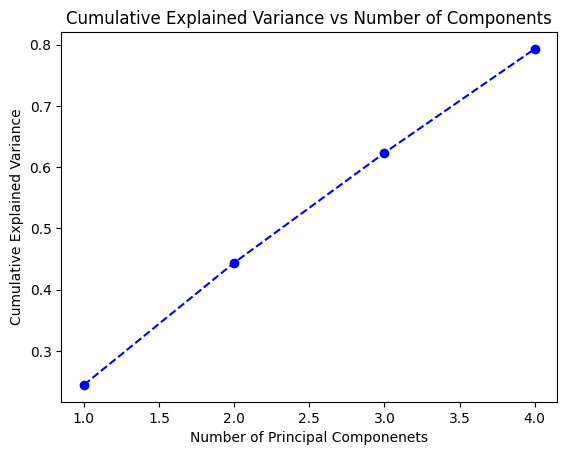

In [ ]:
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker = 'o', linestyle = '--', color = 'blue')
plt.xlabel('Number of Principal Componenets')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()

In [ ]:
best_xgb_params = {
    'colsample_bytree': 0.6872700594236812,
    'gamma': 0.9507143064099162,
    'learning_rate': 0.04159969709057025,
    'max_depth': 7,
    'min_child_weight': 7,
    'n_estimators': 321,
    'reg_alpha': 0.15599452033620265,
    'reg_lambda': 0.6161672243363989,
    'subsample': 0.9330880728874675,
    'random_state': 42,
    'n_jobs': -1
}

models = {
    "XGBoost (tuned) PCA": XGBRegressor(**best_xgb_params)
}

results = []
train_mse_values = []
test_mse_values = []
cv_mse_values = []
model_names = []

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits = 10, shuffle=True, random_state=42)

for name, model in models.items():
  cv_mse = -cross_val_score(model, X_train_scaled_pca, y_train, cv = kf, scoring = 'neg_mean_squared_error')
  avg_cv_mse = np.mean(cv_mse)

  model.fit(X_train_scaled_pca, y_train)

  y_train_pred = model.predict(X_train_scaled_pca)
  y_test_pred = model.predict(X_test_scaled_pca)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)
  train_r2_score = r2_score(y_train, y_train_pred)
  test_r2_score = r2_score(y_test, y_test_pred)

  results.append((name, avg_cv_mse, train_mse, test_mse, test_rmse, train_r2_score, test_r2_score))


In [ ]:
pd.DataFrame(results, columns = ['Model', 'Cv MSE', 'Train MSE', 'Test MSE', 'Test RMSE', 'Train R2', 'Test R2']).sort_values(by = 'Test MSE')

,Model,Cv MSE,Train MSE,Test MSE,Test RMSE,Train R2,Test R2
0,XGBoost (tuned) PCA,2.08794,1.475591,1.713835,1.309135,0.747515,0.663363


Applying PCA notably reduced model performance, since we only captured around 80% of variance in the dataset. While tuning refined model's parameters, using PCA likely oversimplified feature relationships, leading to higher error and lower $R^2$ compared to both the default hyperparamter model and tuned hyperparameter model.

## k-Means Clustering

[[-1.05813431 -0.99260391  1.18040391  1.04335271]
 [-2.03991131  0.46653325  0.99358531 -0.27403103]]


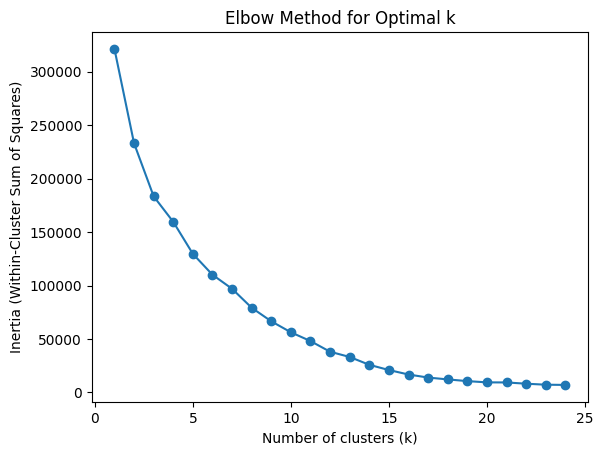

In [ ]:
print(X_train_scaled_pca[:2, :])

inertias = []
k_range = range(1, 25)
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train_scaled_pca)
  inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

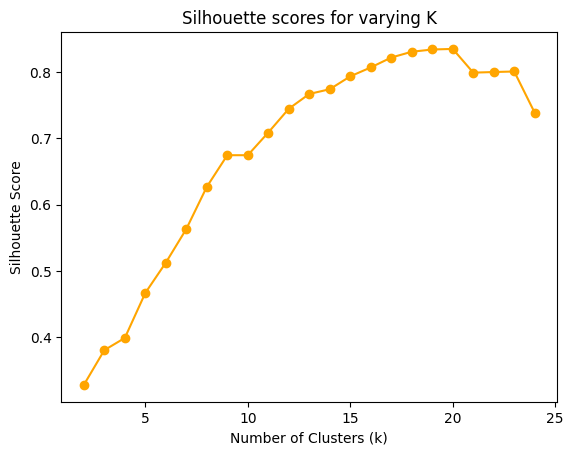

In [ ]:
silhouette_scores = []
k_range = range(2, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_scaled_pca)
    sil_score = silhouette_score(X_train_scaled_pca, labels, sample_size=5000, random_state=42)
    silhouette_scores.append(sil_score)

plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette scores for varying K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(best_k)

kmeans_final = KMeans(n_clusters = best_k, random_state = 42)
# kmeans_final = KMeans(n_clusters = 3, random_state = 42)


train_clusters = kmeans_final.fit_predict(X_train_scaled_pca)
test_clusters = kmeans_final.predict(X_test_scaled_pca)

20


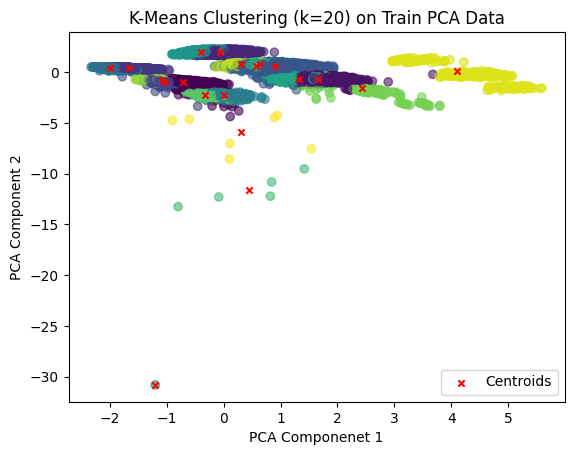

In [ ]:
plt.scatter(X_train_scaled_pca[:, 0], X_train_scaled_pca[:, 1], c = train_clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c= 'red', marker = 'x', s=20, label='Centroids')
plt.xlabel('PCA Componenet 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering (k={best_k}) on Train PCA Data')
plt.legend()
plt.show()

## Inverse Transform ILR Components

In [95]:
X_test

,geographic_id,area,county,state,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
28555,37093970402,0.009244,Hoke County,North Carolina,19.781479,13.987618,-7.735770,-6.316230,-5.047798
42613,41005020601,0.000325,Clackamas County,Oregon,0.902211,20.315823,-1.558944,-2.973121,-5.024121
62618,29071800603,0.001981,Franklin County,Missouri,2.383725,20.117065,-3.920437,-1.834163,-3.831832
50288,17113001302,0.000077,McLean County,Illinois,1.666398,1.529465,-1.630384,2.296600,-0.503256
30738,45079010501,0.000830,Richland County,South Carolina,2.287018,19.177545,-5.737398,-2.322729,-4.082416
...,...,...,...,...,...,...,...,...,...
12657,48201522302,0.000121,Harris County,Texas,19.776167,13.983862,10.831853,-10.902619,-10.698452
33795,6023011100,0.032389,Humboldt County,California,19.685595,13.919818,-8.331995,12.705343,-10.427176
60180,26125193000,0.000336,Oakland County,Michigan,18.933805,13.388222,-10.268114,-7.324505,-7.894488
608,4013116732,0.000657,Maricopa County,Arizona,3.026087,1.353192,0.999060,1.062229,-1.642759


In [103]:
X_test_unscaled_array = scaler.inverse_transform(X_test_scaled)
X_test_unscaled = pd.DataFrame(
    X_test_unscaled_array,
    index=X_test.index,
    columns=['area', 'ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']
)

X_test_unscaled.head()

,area,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
28555,0.009244,19.781479,13.987618,-7.735770,-6.316230,-5.047798
42613,0.000325,0.902211,20.315823,-1.558944,-2.973121,-5.024121
62618,0.001981,2.383725,20.117065,-3.920437,-1.834163,-3.831832
50288,0.000077,1.666398,1.529465,-1.630384,2.296600,-0.503256
30738,0.000830,2.287018,19.177545,-5.737398,-2.322729,-4.082416


In [104]:
observed_feature_balances = X_test_unscaled[['ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']]
Z_hat_target = pd.Series(y_test_pred.flatten(), index=observed_feature_balances.index, name='ilr_0_hat')
Z_observed_target = pd.Series(y_test.values.flatten(), index=observed_feature_balances.index, name='ilr_0')
Z_full_evaluation = pd.concat([Z_hat_target, Z_observed_target, observed_feature_balances], axis=1)
final_cols_order = ['ilr_0', 'ilr_0_hat', 'ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']
Z_full_evaluation = Z_full_evaluation[final_cols_order]
Z_full_evaluation.head()

,ilr_0,ilr_0_hat,ilr_1,ilr_2,ilr_3,ilr_4,ilr_5
28555,1.310718,1.781230,19.781479,13.987618,-7.735770,-6.316230,-5.047798
42613,1.351258,1.311693,0.902211,20.315823,-1.558944,-2.973121,-5.024121
62618,1.134437,1.735094,2.383725,20.117065,-3.920437,-1.834163,-3.831832
50288,1.079692,2.271417,1.666398,1.529465,-1.630384,2.296600,-0.503256
30738,2.864381,2.290531,2.287018,19.177545,-5.737398,-2.322729,-4.082416


In [105]:
D = 7
ORIGINAL_COMPONENTS = [
    'percent_own_vehicle_alone',
    'percent_own_vehicle_carpool',
    'percent_public',
    'percent_bicycle',
    'percent_walking',
    'percent_other',
    'percent_wfh'
]

def inverse_ilr(ilr_balances: Union[pd.DataFrame, np.ndarray], component_names: List[str]) -> pd.DataFrame:
  """
  Performs the Inverse Isometric Log-Ratio (ILR) transformation.
  """
  D_comp = len(component_names)
  Z = ilr_balances.values if isinstance(ilr_balances, pd.DataFrame) else ilr_balances

  V = _generate_ilr_basis(D_comp)
  Y = Z @ V.T

  # Aitchison Closure (Exponentiation and Normalization)
  X_raw = np.exp(Y)
  X_closed = X_raw / X_raw.sum(axis=1, keepdims=True)

  return pd.DataFrame(X_closed, columns=component_names, index=ilr_balances.index if isinstance(ilr_balances, pd.DataFrame) else None)


In [106]:
# # A. Back-Transform OBSERVED Composition (X_obs)
observed_ilr = Z_full_evaluation[['ilr_0', 'ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']]
X_observed = inverse_ilr(observed_ilr, ORIGINAL_COMPONENTS)
X_observed.columns = [f'Observed_{col}' for col in X_observed.columns]


# B. Back-Transform PREDICTED Composition (X_pred)
predicted_ilr = Z_full_evaluation[['ilr_0_hat', 'ilr_1', 'ilr_2', 'ilr_3', 'ilr_4', 'ilr_5']]
X_predicted = inverse_ilr(predicted_ilr, ORIGINAL_COMPONENTS)
X_predicted.columns = [f'Predicted_{col}' for col in X_predicted.columns]


# C. Create Final Evaluation Table - ONLY PROPORTIONS
final_composition_df = pd.concat([X_observed, X_predicted], axis=1)
final_composition_df.head()

,Observed_percent_own_vehicle_alone,Observed_percent_own_vehicle_carpool,Observed_percent_public,Observed_percent_bicycle,Observed_percent_walking,Observed_percent_other,Observed_percent_wfh,Predicted_percent_own_vehicle_alone,Predicted_percent_own_vehicle_carpool,Predicted_percent_public,Predicted_percent_bicycle,Predicted_percent_walking,Predicted_percent_other,Predicted_percent_wfh
28555,0.840000,0.131600,1.000000e-11,1.000000e-11,0.010400,0.010400,0.007600,0.905159,0.072899,7.726005e-12,7.726005e-12,0.008035,0.008035,0.005872
42613,0.579300,0.085700,7.380000e-02,1.000000e-11,0.002500,0.016100,0.242600,0.571056,0.089342,7.481378e-02,1.013737e-11,0.002534,0.016321,0.245933
62618,0.723372,0.145415,1.750175e-02,1.000100e-11,0.029503,0.006601,0.077608,0.830160,0.071366,1.313482e-02,7.505611e-12,0.022142,0.004954,0.058244
50288,0.396400,0.086100,2.400000e-02,1.600000e-02,0.372400,0.007000,0.098100,0.624081,0.025129,1.626854e-02,1.084569e-02,0.252433,0.004745,0.066498
30738,0.798500,0.013900,6.400000e-03,1.000000e-11,0.099700,0.007500,0.074000,0.718540,0.028161,8.641340e-03,1.350209e-11,0.134616,0.010127,0.099915


In [107]:
geo_info = X_test[['state', 'county', 'geographic_id']].copy()
analysis_table = geo_info.join(final_composition_df)

In [108]:
analysis_table.tail()

,state,county,geographic_id,Observed_percent_own_vehicle_alone,Observed_percent_own_vehicle_carpool,Observed_percent_public,Observed_percent_bicycle,Observed_percent_walking,Observed_percent_other,Observed_percent_wfh,Predicted_percent_own_vehicle_alone,Predicted_percent_own_vehicle_carpool,Predicted_percent_public,Predicted_percent_bicycle,Predicted_percent_walking,Predicted_percent_other,Predicted_percent_wfh
12657,Texas,Harris County,48201522302,0.695000,0.157000,1.000000e-11,1.000000e-11,1.000000e-11,2.480000e-02,0.123200,0.806747,0.079667,7.674756e-12,7.674756e-12,7.674756e-12,1.903339e-02,0.094553
33795,California,Humboldt County,6023011100,0.784678,0.111411,1.000100e-11,1.000100e-11,1.910191e-02,1.000100e-11,0.084808,0.807353,0.095210,9.377933e-12,9.377933e-12,1.791185e-02,9.377933e-12,0.079525
60180,Michigan,Oakland County,26125193000,0.632900,0.021900,1.000000e-11,1.000000e-11,1.050000e-01,3.290000e-02,0.207300,0.495651,0.048718,1.319904e-11,1.319904e-11,1.385899e-01,4.342484e-02,0.273616
608,Arizona,Maricopa County,4013116732,0.748725,0.055294,4.999500e-03,1.239876e-02,1.309869e-02,9.999000e-03,0.155484,0.718821,0.068090,5.435956e-03,1.348117e-02,1.424220e-02,1.087191e-02,0.169058
55133,Maine,Somerset County,23025966701,0.792079,0.073407,1.000100e-11,1.000100e-11,4.000400e-02,1.000100e-11,0.094509,0.796571,0.070879,9.855067e-12,9.855067e-12,3.942027e-02,9.855067e-12,0.093130


In [109]:
analysis_table.to_csv('dot_analysis_table.csv')

In [ ]:
# Continue with plots, model diagnostics, model explanation etc... I'm leaving this project just here, whoever is interested can build upon it.
# Please cite and give credit whenever you are tweaking or building upon this.
# There is a lot of things you can do here that I haven't gone through.
# Thank you!

In [110]:
error = (analysis_table['Observed_percent_own_vehicle_alone'] - analysis_table['Predicted_percent_own_vehicle_alone'])**2
error.sum()/analysis_table.shape[0]

np.float64(0.01563904647596124)